In [26]:
import os
import pandas as pd
import glob
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil

In [27]:
base_dir = 'PlantDoc-Dataset-windows-compatible'

In [28]:
#тут уже данные поделены

train_dir=os.path.join(base_dir, 'train')
test_dir=os.path.join(base_dir, 'test')

In [30]:
#код, чтобы вспомнить в каком классе было только 2 изображения

train_labels = []
for imagePath in os.listdir(train_dir):
	l = imagePath
	train_labels.append(l)

test_labels = []
for imagePath in os.listdir(test_dir):
	l = imagePath
	test_labels.append(l)

train_labels.sort()
test_labels.sort()

if train_labels == test_labels:
    print("The lists are identical")
else:
    print("The lists are not identical")

print(list(set(train_labels) - set(test_labels)))

#path = Path(os.path.join(train_dir, 'Tomato Twospotted spider mite'))

#print(len(list(path.iterdir())))

The lists are identical
[]


In [7]:
shutil.rmtree(os.path.join(train_dir, 'Tomato Twospotted spider mite'))

In [33]:
#в test нет одного класса, в train этот класс содержит 2 изображения
#берем классы только из test и забываем про класс из 2 изображений

plant_labels = []
for imagePath in os.listdir(train_dir):
	l = imagePath.split(os.path.sep)[-1].split(" ", 1)
	plant_labels.append(l)

plant_labels

[['.ipynb_checkpoints'],
 ['Squash', 'Powdery mildew'],
 ['Corn', 'leaf blight'],
 ['Apple', 'Healthy'],
 ['Tomato', 'Bacterial spot'],
 ['Apple', 'Scab'],
 ['Bell_pepper', 'Healthy'],
 ['Apple', 'Rust'],
 ['Tomato', 'mold leaf'],
 ['Grape', 'Healthy'],
 ['Tomato', 'Septoria leaf spot'],
 ['Potato', 'Late blight'],
 ['Corn', 'Rust'],
 ['Tomato', 'Early blight'],
 ['Raspberry', 'Healthy'],
 ['Tomato', 'Late blight'],
 ['Tomato', 'Mosaic virus'],
 ['Tomato', 'Yellow leaf virus'],
 ['Cherry', 'Healthy'],
 ['Peach', 'Healthy'],
 ['Tomato', 'Healthy'],
 ['Blueberry', 'Healthy'],
 ['Bell_pepper', 'Bacterial spot'],
 ['Soyabean', 'Healthy'],
 ['Corn', 'Gray leaf spot'],
 ['Strawberry', 'Healthy'],
 ['Potato', 'Early blight'],
 ['Grape', 'Black rot']]

In [34]:
plant_labels.remove(['.ipynb_checkpoints'])

plant_labels

[['Squash', 'Powdery mildew'],
 ['Corn', 'leaf blight'],
 ['Apple', 'Healthy'],
 ['Tomato', 'Bacterial spot'],
 ['Apple', 'Scab'],
 ['Bell_pepper', 'Healthy'],
 ['Apple', 'Rust'],
 ['Tomato', 'mold leaf'],
 ['Grape', 'Healthy'],
 ['Tomato', 'Septoria leaf spot'],
 ['Potato', 'Late blight'],
 ['Corn', 'Rust'],
 ['Tomato', 'Early blight'],
 ['Raspberry', 'Healthy'],
 ['Tomato', 'Late blight'],
 ['Tomato', 'Mosaic virus'],
 ['Tomato', 'Yellow leaf virus'],
 ['Cherry', 'Healthy'],
 ['Peach', 'Healthy'],
 ['Tomato', 'Healthy'],
 ['Blueberry', 'Healthy'],
 ['Bell_pepper', 'Bacterial spot'],
 ['Soyabean', 'Healthy'],
 ['Corn', 'Gray leaf spot'],
 ['Strawberry', 'Healthy'],
 ['Potato', 'Early blight'],
 ['Grape', 'Black rot']]

In [37]:
classes_list = []
for item in plant_labels:
    if item[0] not in classes_list:
        classes_list.append(item[0])
    if item[1] not in classes_list:
        classes_list.append(item[1])

#classes_list.remove('leaf')

In [38]:
classes_list

['Squash',
 'Powdery mildew',
 'Corn',
 'leaf blight',
 'Apple',
 'Healthy',
 'Tomato',
 'Bacterial spot',
 'Scab',
 'Bell_pepper',
 'Rust',
 'mold leaf',
 'Grape',
 'Septoria leaf spot',
 'Potato',
 'Late blight',
 'Early blight',
 'Raspberry',
 'Mosaic virus',
 'Yellow leaf virus',
 'Cherry',
 'Peach',
 'Blueberry',
 'Soyabean',
 'Gray leaf spot',
 'Strawberry',
 'Black rot']

In [39]:
#этот кусок кода был просто тестовый

for lists in os.listdir(train_dir):
    path = os.path.join(train_dir, lists)
    for filename in glob.glob(path+'/*'):
        p_l = lists.split(os.path.sep)[-1].split(" ", 1)
        img_class=[]
        if p_l[0] in classes_list:
            img_class.append(p_l[0])
        if p_l[1] in classes_list:
            img_class.append(p_l[1])

In [40]:
#тут если хочешь сам функцию сделай для train и test

with open('plantdoc_annotation.csv', 'w', newline='') as file:
    file.write("id;classes;")
    file.write('\n')
    for lists in os.listdir(train_dir):
        path = os.path.join(train_dir, lists)
        for filename in glob.glob(path+'/*'):
            file.write(os.path.basename(filename))
            file.write(';')
            p_l = lists.split(os.path.sep)[-1].split(" ", 1)
            img_class=[]
            if p_l[0] in classes_list:
                img_class.append(p_l[0])
            if len(p_l)>1 and p_l[1] in classes_list:
                img_class.append(p_l[1])
            file.write(str(img_class))
            file.write(';')
            file.write('\n')
    for lists in os.listdir(test_dir):
        path = os.path.join(test_dir, lists)
        for filename in glob.glob(path+'/*'):
            file.write(os.path.basename(filename))
            file.write(';')
            p_l = lists.split(os.path.sep)[-1].split(" ", 1)
            img_class=[]
            if p_l[0] in classes_list:
                img_class.append(p_l[0])
            if len(p_l)>1 and p_l[1] in classes_list:
                img_class.append(p_l[1])
            file.write(str(img_class))
            file.write(';')
            file.write('\n')

In [41]:
classes_list

['Squash',
 'Powdery mildew',
 'Corn',
 'leaf blight',
 'Apple',
 'Healthy',
 'Tomato',
 'Bacterial spot',
 'Scab',
 'Bell_pepper',
 'Rust',
 'mold leaf',
 'Grape',
 'Septoria leaf spot',
 'Potato',
 'Late blight',
 'Early blight',
 'Raspberry',
 'Mosaic virus',
 'Yellow leaf virus',
 'Cherry',
 'Peach',
 'Blueberry',
 'Soyabean',
 'Gray leaf spot',
 'Strawberry',
 'Black rot']

In [42]:
img_metadata = pd.read_csv('plantdoc_annotation.csv',sep=';')
img_metadata = img_metadata.drop('Unnamed: 2', axis=1)
img_metadata['id'] = img_metadata['id'].apply(lambda x: 'plantsdoc/' + x)
img_metadata['classes'] = img_metadata['classes'].apply(lambda x: eval(x))
img_metadata.head()

id                   classes
0  plantsdoc/B9230061-Powdery_Mildew_on_Squash_Le...  [Squash, Powdery mildew]
1             plantsdoc/16488048256_f64cfea40e_z.jpg  [Squash, Powdery mildew]
2  plantsdoc/87985926-1-56a349f35f9b58b7d0d14d82.jpg  [Squash, Powdery mildew]
3     plantsdoc/53cf2cffb466d325a61897ef320cfccf.jpg  [Squash, Powdery mildew]
4  plantsdoc/flora-ivy-plant-food-produce-vegetab...  [Squash, Powdery mildew]

In [43]:
img_metadata.classes

0       [Squash, Powdery mildew]
1       [Squash, Powdery mildew]
2       [Squash, Powdery mildew]
3       [Squash, Powdery mildew]
4       [Squash, Powdery mildew]
                  ...           
2564          [Grape, Black rot]
2565          [Grape, Black rot]
2566          [Grape, Black rot]
2567          [Grape, Black rot]
2568          [Grape, Black rot]
Name: classes, Length: 2569, dtype: object

In [44]:
all_classes = img_metadata['classes'].apply(pd.Series).stack().tolist()

# Извлекаем уникальные классы с помощью set
unique_classes = set(all_classes)

# Если нужно получить результат в виде списка
unique_classes_list = np.array(list(unique_classes))

print(unique_classes_list)

['Gray leaf spot' 'leaf blight' 'Raspberry' 'Corn' 'Mosaic virus' 'Scab'
 'Bell_pepper' 'Powdery mildew' 'Potato' 'Early blight'
 'Yellow leaf virus' 'Strawberry' 'Apple' 'Healthy' 'Late blight'
 'Black rot' 'Squash' 'Tomato' 'Peach' 'Septoria leaf spot' 'Blueberry'
 'Rust' 'mold leaf' 'Cherry' 'Soyabean' 'Grape' 'Bacterial spot']


In [45]:
unique_classes_list.shape

(27,)

In [46]:
#тут тоже хочешь сделай функцию если тебя сильно коробит

!mkdir -p plantsdoc
destination_directory = 'plantsdoc/'

for lists in tqdm(os.listdir(train_dir)):
    path = os.path.join(train_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)
        
for lists in tqdm(os.listdir(test_dir)):
    path = os.path.join(test_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)

100%|██████████████████████████████████████████| 28/28 [00:00<00:00, 224.93it/s]


Text(0.5, 1.0, "['Squash', 'Powdery mildew']")

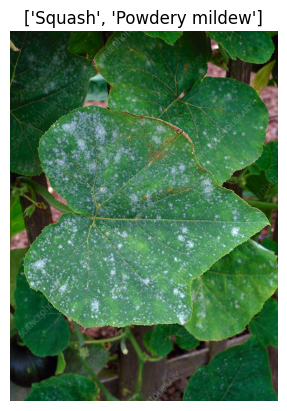

In [47]:
img = plt.imread(img_metadata.id[0])
plt.imshow(img)
plt.axis('off')
plt.title((img_metadata.classes[0]))